<a id=contents></a>

# Model building

In this notebook I'm loading up the BERTopic model that I had trained on GoogleColab, merging the results of the model with the rest of the data and exploring the results. 


[1. Loading up the training data and model](#one1)

[2. Exploring the topics](#two)

[3. Linkages in Topics](#three)

[4. Our main topics over time](#four)

[5. Sentiment over time](#five)

<!-- [6. Conclusions and model comparison table](#conc) -->

<a id=one1></a>

## 1. Load up training data and model

[LINK to table of contents](#contents)

In [35]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy.stats import hmean
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pickle, io
from pathlib import Path

viz_path = Path('data/viz/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
print('Loading up docs')
filepath = 'data/clean/features/text_for_topics_post_Aug22.csv'
docs = pd.read_csv(filepath, index_col='tweet_id')

#meta data getting loaded too
filepath = 'data/clean/dashboard_data.csv'
df = pd.read_csv(filepath, index_col='tweet_id').drop(columns=['Unnamed: 0', 'clean_tweet_text'],)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.join(docs, how='right')
df.info()

Loading up docs
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12037 entries, 1580168615357140992 to 1565189065158311937
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Unnamed: 0.2                 12037 non-null  int64              
 1   Unnamed: 0.1                 12037 non-null  int64              
 2   datetime                     12037 non-null  datetime64[ns, UTC]
 3   display_name                 12037 non-null  object             
 4   tweet_text                   12037 non-null  object             
 5   User_id                      12037 non-null  float64            
 6   #likes                       12037 non-null  float64            
 7   #retweets                    12037 non-null  float64            
 8   #responses                   12037 non-null  float64            
 9   language                     12037 non-null  object             
 10

 Unfortunately I am still experiencing errors with the loading of the model there are some issues logged with the way that Bertopic models are saved at the moment and I hope to be able to load up the model. However, you can reproduce the model entirely on GoogleColab using the colab notebook in this repo.
 I have downloaded however all the other necessary data for exploring the model results. 

In [37]:
# topic_model = joblib.load('models/topic/BertTopic/topic_model_final.pkl', 'r+')

<a id=two></a>

## 2. Exploring the topics

[LINK to table of contents](#contents)

In [38]:
#dict that I wrote on Gcolab when originally inspecting the data for renaming some of the principal topics we have 

# topic_labels = {
#     1:'Russia_Ukraine_and_war',
#     2:'Twitter_bots',
#     5:'Starlink_and_satellites',
#     6:'SpaceX',
#     11:'Robots_and_AI',
#   }

topic_labels= {
    1:'Russia_Ukraine_and_war',
    39:'Twitter_bots_and_spam',
    8:'Starlink_and_satellites',
    6:'SpaceX',
    4:'Future_of_humanity_and_robots',
    31:'Neuralink_and_brains',
  }

In [39]:
topics = pd.read_csv('data/preds/text_topic_probs.csv', index_col='tweet_id')
topics.insert(0, 'Main_topic' , topics[topics.columns[:-1]].apply(lambda x: x.argmax(), axis=1))
topics['Main_topic'].replace(topic_labels, inplace=True)
topics.head(2)

,Main_topic,0,1,2,3,4,5,6,7,8,...,72,73,74,75,76,77,78,79,80,clean_tweet_text
tweet_id,,,,,,,,,,,,,,,,,,,,,
1580168615357140992,0,1.000000,6.432442e-307,5.511312e-307,2.038300e-307,8.096814e-307,3.227613e-307,5.407762e-307,3.243999e-307,2.998877e-307,...,2.053662e-307,1.904953e-307,2.424376e-307,1.860363e-307,4.161548e-307,2.612142e-307,2.279323e-307,2.669250e-307,2.154047e-307,My favorite least favorite is ONLY TWO IDEAS
1580013582778974208,0,0.265244,8.951988e-03,6.936520e-03,2.714440e-03,1.096674e-02,2.978305e-03,5.956865e-03,3.633807e-03,3.490880e-03,...,2.171003e-03,2.180062e-03,2.966637e-03,2.100634e-03,4.724942e-03,4.118049e-03,2.455282e-03,3.163200e-03,2.342698e-03,My first day back to twit after a bit youre goin toe to toe w me man u smelled the fear huh Lol😘


In [40]:
#sense checking that the relabelling was done correctly
pd.set_option('max_colwidth', -1)
topics.loc[topics.Main_topic=='Russia_Ukraine_and_war']['clean_tweet_text'].head(4)

tweet_id
1577086092930469890    Another way to say that would be While I appreciate Musks armslength interest in saving lives the suggestion of a deal is moot Putin holds the cards  has no interest in a deal and Ukraine is a sovereign nation with a RIGHT to fight for their land against ANY odds1
1577065939442446336    If a brokered peace is inevitable then getting there sooner saves lives Thats serious like a heart attack and I appreciate the train of thought But I hear the cold water truth you lay out that that is not at all currently possible I paraphrase so pls correct 😔    
1577059935413600257    Current Western characterizations of Putin may indeed be accurate and youre the expert so I believe they are I broached the topic because HISTORICALLY western characterizations have been sometimes intentionally ‘skewed                                              
1576994036581224448    I big issue currently is US love them underdogs sentiment tracks Ukraine bot goals so                   

In [41]:
#sense checking that the relabelling was done correctly
pd.set_option('max_colwidth', -1)
topics.loc[topics.Main_topic=='Starlink_and_satellites']['clean_tweet_text'].head(10)

tweet_id
1578617929901707265    This is how Starlink started 😄🙌✨So wild  You got it done                                                                                                                                                  
1579592377697959938    “Starlink launches service in Japan  first country in Asia”Awesome 👏👏👏                                                                                                                                    
1578412086253981696    And Starlink will also provide for faster transactions for Dogecoin                                                                                                                                       
1578120959336230912    There are so many positive implications for Starlink Its amazing to think about the potential it has for connecting people in rural  remote areas on airplane  on ships Starlink can save lives 🚑 too ❤️‍🩹
1570955534467223552    Super thankful for how Starlink is bringing and will bring more 

In [42]:
#sense checking that the relabelling was done correctly
pd.set_option('max_colwidth', -1)
topics.loc[topics.Main_topic=='Twitter_bots']['clean_tweet_text'].tail(10)

Series([], Name: clean_tweet_text, dtype: object)

In [43]:
topics.loc[topics.Main_topic=='Future_of_humanity_and_robots']['clean_tweet_text'].head(10)

tweet_id
1575514006537715712    Robot u hump my X and…                                                                                                                                  
1576050002350133248    The  Robot hand is biologically inspired  “insures that objects in our factory are graspable”                                                           
1578817342553083916    Robotaxi will be awesome 😍                                                                                                                              
1574558656116424710    we can almost feel a future sentient dedicated Robotaxi 🤯                                                                                               
1576027608122204161    Its time to learn how the  Humanoid robot tries to enhance the way of walking                                                                           
1577513667901407232    What does this mean You were working with NASA on humanoid robots then what you got out 

In [44]:
#sense checking that the relabelling was done correctly
pd.set_option('max_colwidth', -1)
topics.loc[topics.Main_topic=='SpaceX']['clean_tweet_text'].head(10)

tweet_id
1579888358452387840    Looking forward to the Falcon Heavy launch come end of October                                                
1577736018744442880    Some of the best memes  historical facts on SpaceX come from Renata                                           
1575902369014915073    Neither is the Falcon 9 rocket landing  cgi ✨🔥🚀                                                               
1574820272170934273    Under the recent SpaceX tweet congratulating NASA  Absurd remarks posted                                      
1577716789961953280    If NASA is ❤ Heart Then spaceX is Heart beat 💓Love you ❤❤❤❤❤❤❤                                                
1570989463798681600    Great interview of  by  about SpaceXs crazy ambitious plans                                                   
1579964403126272005    And what did world peas cost humanity Hawaii😢 and Florida🫤 Good thing SpaceX is building up Boca ChicaStarbase
1578131557633720346    Can SpaceX build a new space s

In [45]:
select_topics = list(topic_labels.values())
topics_select = topics.loc[topics.Main_topic.isin(select_topics)][['Main_topic', 'clean_tweet_text']]

In [46]:
topics_select.head()

,Main_topic,clean_tweet_text
tweet_id,,
1577086092930469890,Russia_Ukraine_and_war,Another way to say that would be While I appreciate Musks armslength interest in saving lives the suggestion of a deal is moot Putin holds the cards has no interest in a deal and Ukraine is a sovereign nation with a RIGHT to fight for their land against ANY odds1
1577065939442446336,Russia_Ukraine_and_war,If a brokered peace is inevitable then getting there sooner saves lives Thats serious like a heart attack and I appreciate the train of thought But I hear the cold water truth you lay out that that is not at all currently possible I paraphrase so pls correct 😔
1577059935413600257,Russia_Ukraine_and_war,Current Western characterizations of Putin may indeed be accurate and youre the expert so I believe they are I broached the topic because HISTORICALLY western characterizations have been sometimes intentionally ‘skewed
1576994036581224448,Russia_Ukraine_and_war,I big issue currently is US love them underdogs sentiment tracks Ukraine bot goals so
1576992774284447745,Russia_Ukraine_and_war,I get that given our western characterizations of Putin he doesnt seem like a fella thats ever gonna accept UNsupervised elections


In [47]:
# we can also take the topic probabilites for our selected topics and calculate correlations with twitter stats
col_repl_dict = {
    '1':'Russia_Ukraine_and_war',
    '39':'Twitter_bots_and_spam',
    '8':'Starlink_and_satellites',
    '6':'SpaceX',
    '4':'Future_of_humanity_and_robots',
    '31':'Neuralink_and_brains',
  }

# topics.insert(0, 'Main_topic' , topic_values[topic_values.columns[1:-1]].apply(lambda x: x.argmax(), axis=1))
topic_values = topics.rename(col_repl_dict, axis=1)
topic_values = topic_values.loc[topic_values.Main_topic.isin(list(col_repl_dict.values()))]
topic_values_select = topic_values[list(col_repl_dict.values())]
topic_values_select = topic_values_select.join([df[['datetime', 'By_or_at_Musk',
                                                 '#likes',	'#retweets','#responses']]], how='inner')
topic_values_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866 entries, 1577086092930469890 to 1566822635056599043
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   Russia_Ukraine_and_war         866 non-null    float64            
 1   Twitter_bots_and_spam          866 non-null    float64            
 2   Starlink_and_satellites        866 non-null    float64            
 3   SpaceX                         866 non-null    float64            
 4   Future_of_humanity_and_robots  866 non-null    float64            
 5   Neuralink_and_brains           866 non-null    float64            
 6   datetime                       866 non-null    datetime64[ns, UTC]
 7   By_or_at_Musk                  866 non-null    object             
 8   #likes                         866 non-null    float64            
 9   #retweets                      866 non-null    float64          

In [48]:
topic_values_select.columns

Index(['Russia_Ukraine_and_war', 'Twitter_bots_and_spam',
       'Starlink_and_satellites', 'SpaceX', 'Future_of_humanity_and_robots',
       'Neuralink_and_brains', 'datetime', 'By_or_at_Musk', '#likes',
       '#retweets', '#responses'],
      dtype='object')

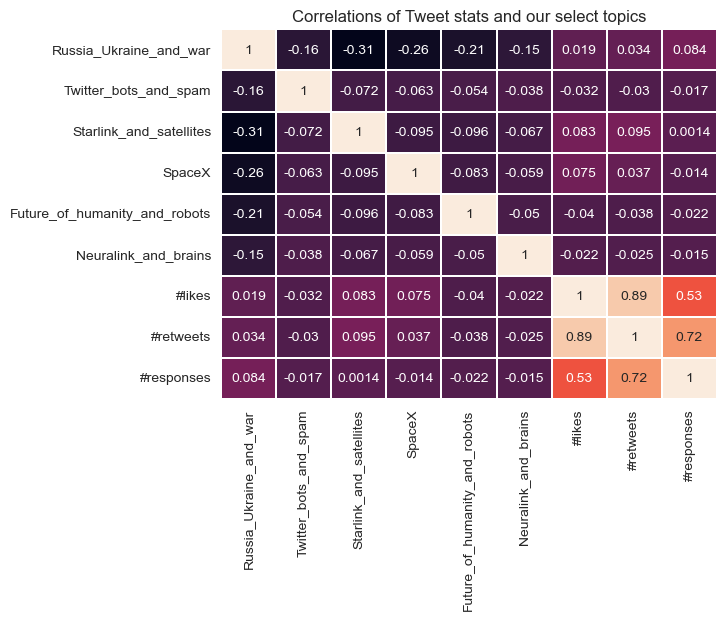

In [49]:
from sklearn.preprocessing import StandardScaler


cols = ['Russia_Ukraine_and_war', 'Twitter_bots_and_spam',
       'Starlink_and_satellites', 'SpaceX', 'Future_of_humanity_and_robots',
       'Neuralink_and_brains',
        '#likes', '#retweets',
       '#responses'
       ]
#scale our values 
ss = StandardScaler()
topic_values_select_ss = pd.DataFrame(ss.fit_transform(topic_values_select[cols]), index=topic_values_select.index, 
                                    columns = cols)

corr_topic_values = topic_values_select_ss.corr()

plt.title('Correlations of Tweet stats and our select topics')
sns.heatmap(corr_topic_values, linewidths=0.05, cbar=False, annot=True);

Interestingly enough, there appear to be no significant correlations between tweet stats and the topics, at least not when using the topic probability as a proxy for topic strength. It's important to note that this may not be revealing the full picture - this data has a lot more of the noise contained within it than the subselection where we've taken those tweets that the topic model has categorised as primarily belonging to these categories (n=48). Let's v quickly subset by the index in our other dataset, and let's do it purely for Musk's tweets. 


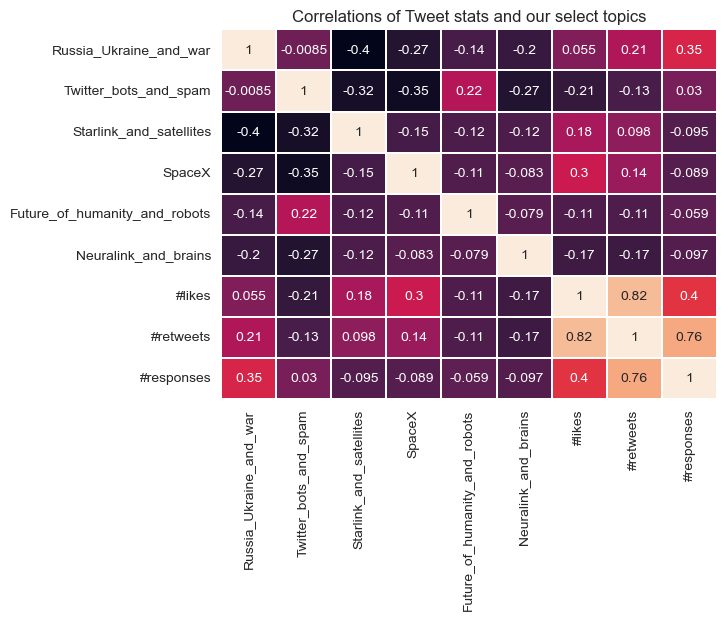

In [50]:
cols = ['Russia_Ukraine_and_war', 'Twitter_bots_and_spam',
       'Starlink_and_satellites', 'SpaceX', 'Future_of_humanity_and_robots',
       'Neuralink_and_brains', '#likes', '#retweets',
       '#responses']

#subset by index values
topic_values_select_main = topic_values_select.loc[topic_values_select.By_or_at_Musk=='By @elonmusk']

#scale our values 
ss = StandardScaler()
topic_values_select_ss = pd.DataFrame(ss.fit_transform(topic_values_select_main[cols]), index=topic_values_select_main.index, 
                                    columns = cols)

corr_topic_values = topic_values_select_ss.corr()
topic_values_select_ss.to_csv(str(viz_path/'elon_selection_for_corr.csv'))
plt.title('Correlations of Tweet stats and our select topics')
sns.heatmap(corr_topic_values, linewidths=0.05, cbar=False, annot=True);

Now, looking purely at this slice of the data, removing muh of the noise, we can see two cases of correlation that we are interested in prodding further:

* nr of likes and tweets on SpaceX
* nr of responses and tweets on Russia-Ukraine war

Let's check them for statistical significance. 

| H0: there is no statistically significant correlation between our determined* cluster of Elon Musk's tweets on the Russia-Ukraine war and the number of responses to his tweets. 

| H1: there is a statistically significant correlation between our determined* Elon Musk's tweets on the Russia-Ukraine war and the number of responses to his tweets. 

Setting alpha = 0.05/(number of tests) = 0.025

| H0: there is no statistically significant correlation between our determined* cluster of Elon Musk's tweets on SpaceX and the number of likes to these tweets. 

| H1: there is a statistically significant correlation between our determined* Elon Musk's tweets on SpaceX and the number of likes to these tweets. 

Setting alpha = 0.05/(number of tests) = 0.025

*I'm referring to them as determined by us because these tweets were categorised via a semi-supervised method, and they are not a gold-standard dataset that has been hand-labelled. 

In [51]:
# x = topic_values_select_main['#responses'].to_list()
# y = topic_values_select_main['Russia_Ukraine_and_war'].to_list()

#check if normally distributed, if not, sample
test_df = topic_values_select_main[['#responses', 'Russia_Ukraine_and_war']].copy()
from scipy.stats import pearsonr, normaltest

def test_and_get_normal_var(test_df:pd.DataFrame)->pd.DataFrame:
    for var in test_df.columns:
        print('Variable: ', var)
        normal_t_stat, normal_p_val = normaltest(test_df[var])
        if normal_p_val <=0.05:
            print('Null hypothesis rejected: variable does not come from a normal distribution; Performing random sampling')
            for i in range(0, 100):
                test_df_sample = test_df.sample(frac=0.6, random_state=12345*i)
                normal_t_stat, normal_p_val = normaltest(test_df_sample[var])
                if normal_p_val>0.05:
                    print(f'{i}th sampling: Random sample is a normal distribution')
                    test_df = test_df_sample.copy()
                    break
                else:
                    continue
            normal_t_stat, normal_p_val = normaltest(test_df_sample[var])
            if normal_p_val<=0.05:
                print('Null hypothesis rejected: repeated sampling has not yielded a normal distribution; cannot perform statistical test')
                return test_df
            else:
                test_df = test_df_sample.copy()
                continue
        else:
            print('Failed to reject null hypothesis: variable does come from a normal distribution;')
            return test_df

    return test_df


test_df_sample = test_and_get_normal_var(test_df)
print('\nNumber of data points in random sample: ', len(test_df_sample))
x = test_df_sample['#responses'].to_list()
y = test_df_sample['Russia_Ukraine_and_war'].to_list()

print(pearsonr(x, y))


Variable:  #responses
Null hypothesis rejected: variable does not come from a normal distribution; Performing random sampling
65th sampling: Random sample is a normal distribution
Variable:  Russia_Ukraine_and_war
Null hypothesis rejected: variable does not come from a normal distribution; Performing random sampling
2th sampling: Random sample is a normal distribution

Number of data points in random sample:  15
PearsonRResult(statistic=0.26644621778696587, pvalue=0.33709336191535416)


In [52]:
test_df = topic_values_select_main[['#likes', 'SpaceX']].copy()

test_df_sample = test_and_get_normal_var(test_df)
print('\nNumber of data points in random sample: ', len(test_df_sample))
x = topic_values_select_main['#likes'].to_list()
y = topic_values_select_main['SpaceX'].to_list()

print(pearsonr(x, y))

Variable:  #likes
Null hypothesis rejected: variable does not come from a normal distribution; Performing random sampling
1th sampling: Random sample is a normal distribution
Variable:  SpaceX
Failed to reject null hypothesis: variable does come from a normal distribution;

Number of data points in random sample:  25
PearsonRResult(statistic=0.29616698444339457, pvalue=0.06008440561098024)


The p-values for these two tests were 0.34 and 0.06 respectively. Therefore, we were unable to refute either of the null hypotheses. However, given the small amount of data, I still think it would be worth testing this again in the future, as I suspect a Type-II error. 
As an aside, let's briefly check the the correlations for tweets that are mentioning Elon instead. 

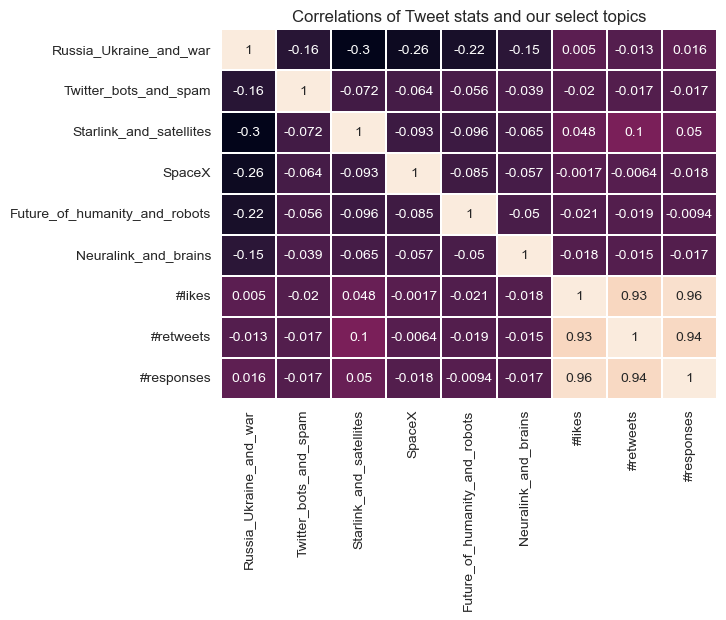

In [53]:
cols = ['Russia_Ukraine_and_war', 'Twitter_bots_and_spam',
       'Starlink_and_satellites', 'SpaceX', 'Future_of_humanity_and_robots',
       'Neuralink_and_brains', '#likes', '#retweets',
       '#responses']

topic_values_select_main = topic_values_select.loc[topic_values_select.By_or_at_Musk!='By @elonmusk']


#scale our values 
ss = StandardScaler()
topic_values_select_ss = pd.DataFrame(ss.fit_transform(topic_values_select_main[cols]), index=topic_values_select_main.index, 
                                    columns = cols)

corr_topic_values = topic_values_select_ss.corr()

plt.title('Correlations of Tweet stats and our select topics')
sns.heatmap(corr_topic_values, linewidths=0.05, cbar=False, annot=True);

As anticipated, there was nothing to report on when looking at this broader association. 
What if we now looked at the data categorically, asigning tweets to the different topics discretely, rather than taking the probability values for the topics? 

In [80]:
topics_categ = topics_select.join([df[['datetime', 'By_or_at_Musk',
                                                 '#likes',	'#retweets','#responses']]], how='inner')
topics_categ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866 entries, 1577086092930469890 to 1566822635056599043
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Main_topic        866 non-null    object             
 1   clean_tweet_text  866 non-null    object             
 2   datetime          866 non-null    datetime64[ns, UTC]
 3   By_or_at_Musk     866 non-null    object             
 4   #likes            866 non-null    float64            
 5   #retweets         866 non-null    float64            
 6   #responses        866 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(3)
memory usage: 54.1+ KB


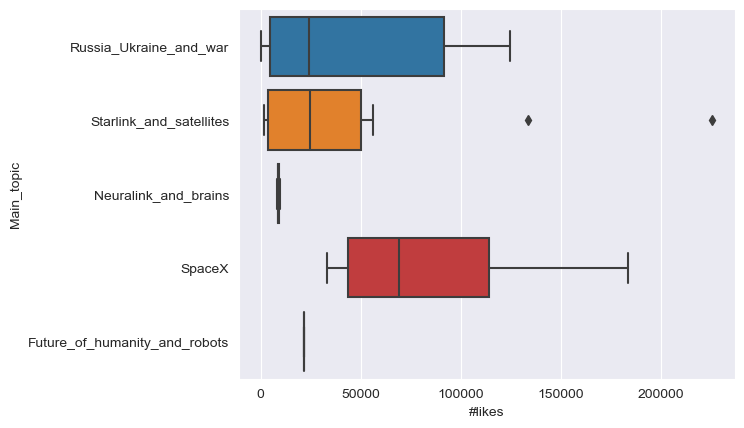

In [55]:
sns.boxplot(data=topics_categ.loc[topics_categ.By_or_at_Musk=='By @elonmusk'], x='#likes', y='Main_topic');

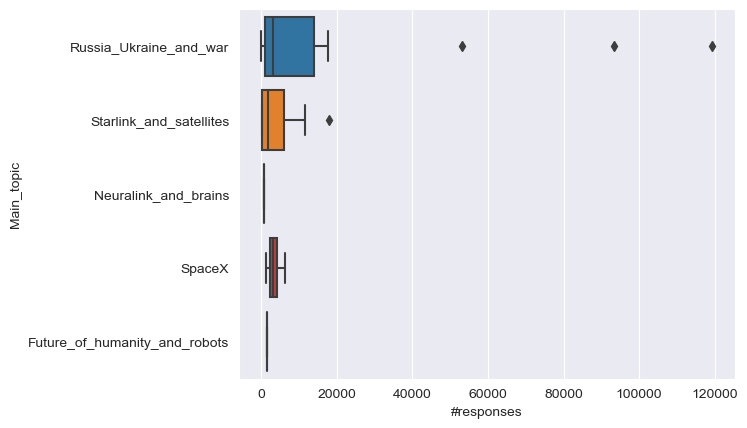

In [56]:
sns.boxplot(data=topics_categ.loc[topics_categ.By_or_at_Musk=='By @elonmusk'], x='#responses', y='Main_topic');

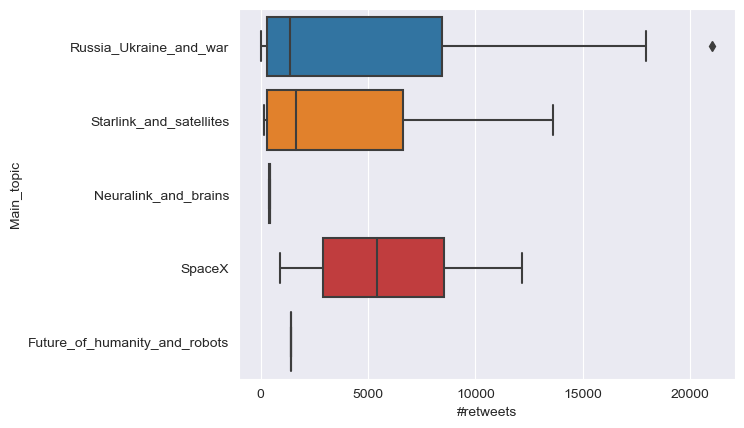

In [57]:
sns.boxplot(data=topics_categ.loc[topics_categ.By_or_at_Musk=='By @elonmusk'], x='#retweets', y='Main_topic');

<a id=three></a>

## 3. Linkages in topics

[LINK to table of contents](#contents)

This will be a very short section since it primarily relies on html graphics generated with BERTopic on Google Colab. 

The very first plot (the hierarchical dendrogram) shows all the topics and how BERTopic has connected them in terms of similarity. This was used to inform how I merged and reduced the number of topics. I have chosen *only* to represent here a **subset** of the topics, namely the ones we were most interested in. 
It's easy to see how topics 35, 36, 1 and 10 are linked in our data. For interpreting this graph, recall that the most important number to count is the number of steps to take along the tree for two topics to connect.
(Note that these are graphs generated with the help of BERTopic and there's far less you can do in terms of graph customization).

**NOTE on reproducibility**: 
The two plots shown below illustrates the topics *as they were prior to merging*. The dataframe used throughout this notebook however, uses the reduced topics. The impact of this is minimal, but if you were to try and filter the dataframe to find rows where the main topic was number 55, it would actually be 48 at the moment, since the number of topics has been reduced (yes, BERTopic also renumbers the topics after reducing them, which is very handy in most cases!).

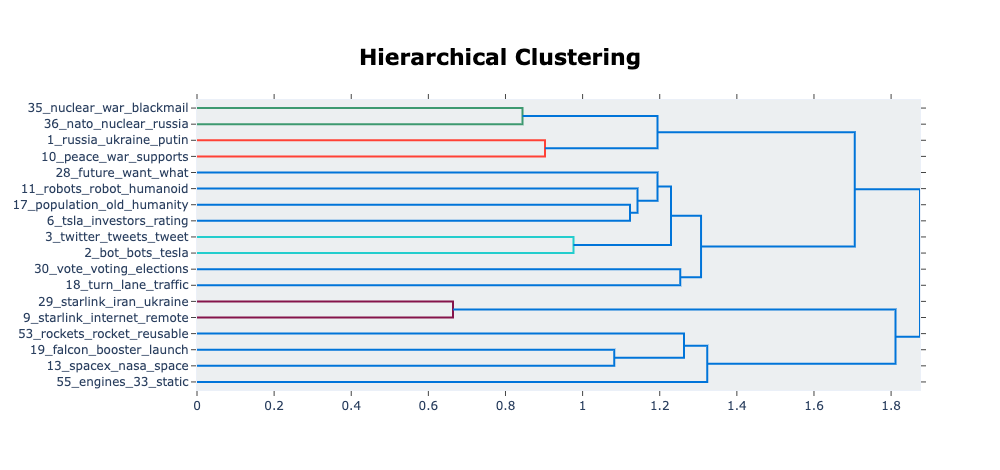

In [58]:
from IPython.display import Image
Image("fig/hierarchical_select_top.png")

Topics 29 and 9 form an understandable cluster together as there were a significant number of tweets focused on Starlink's activity in Ukraine (and its commercial activity more generally), both by Musk and his followers. 
The grouping of clusters 3 and 2 is more interesting: closer inspection of 2 revealed that it includes some tweets related to Twitter bots (something Musk has made a point of discussing openly recently), which would link it sensibly to topic 3; however some of the tweets were also referring to Tesla 'bots' (i.e. Tesla's robotics research and department). If we'd had a set of topic labels for each of these, it's very likely that BERTopic would misclassify the tweets in this particular topic. Topic two tweets range from :

| "Tesla Bot is the future of robotics 🤯 "

to 

| "If Twitter put as much effort into botspam removal as they do into subpoenas we wouldnt have this problem in the first place"

Human language users like us can tell that these are two distinct themes. Yet I'd say that this amalgamation of is quite an understandable mistake, given the amount of words that appear across topic 2 that make it strongly related to topic 3 and others. It is possible that if we had more documents, BERTopic would've split topic 2 into another leaf. 

Towards the bottom we can also see three topics that, although not as closely aligned as the war-themed ones, still cluster together. These are all connected by the theme of rocketry, SpaceX and all of Musk's space-related endeavours. It's encouraging to see that the model was able to place these closely together. Note the next leaf that joins this particular sub-branch, topic 55, related to engines. Now, when I originally looked at this topic, I figured that the algorithm had misgrouped again and that discussions of engines must be focussed on cars. However, I was wrong and the algo was right - inspection of the tweets with this as their main topic (currently topic nr 48 in our merged data) revealed that my intuition was wrong:

| "Hi Elon  😀 According to  380 tankers delivered to Starbase So I would be really happy to know Will B7 performs a long duration full stack 33 engines static fire Thanks🙏😀"

and

| "How certain are you on the final number of engines for Superheavy Booster"

and, a slight outlier in some sense:

| "there will be a day when there are literally 69 boosters 🤓"

I do enjoy points of childish levity in a dataset. 
*Anyway*, this is another great example of BERTopic's strengths as a model. 

The next diagrams shows the topics and their constituent topics, collapsed onto a 2-D plane with UMAP. It's very encouraging to see that the tweets we know to be distinct clusters (1,36,35,10 and 19,53) are still visibly separate even in this representation.

(If you wish to inspect this further there are two HTML files of this saved in the fig folder)

(I have deliverately not highlighted all of the topics of interest here because the plot would be far too cluttered them.)

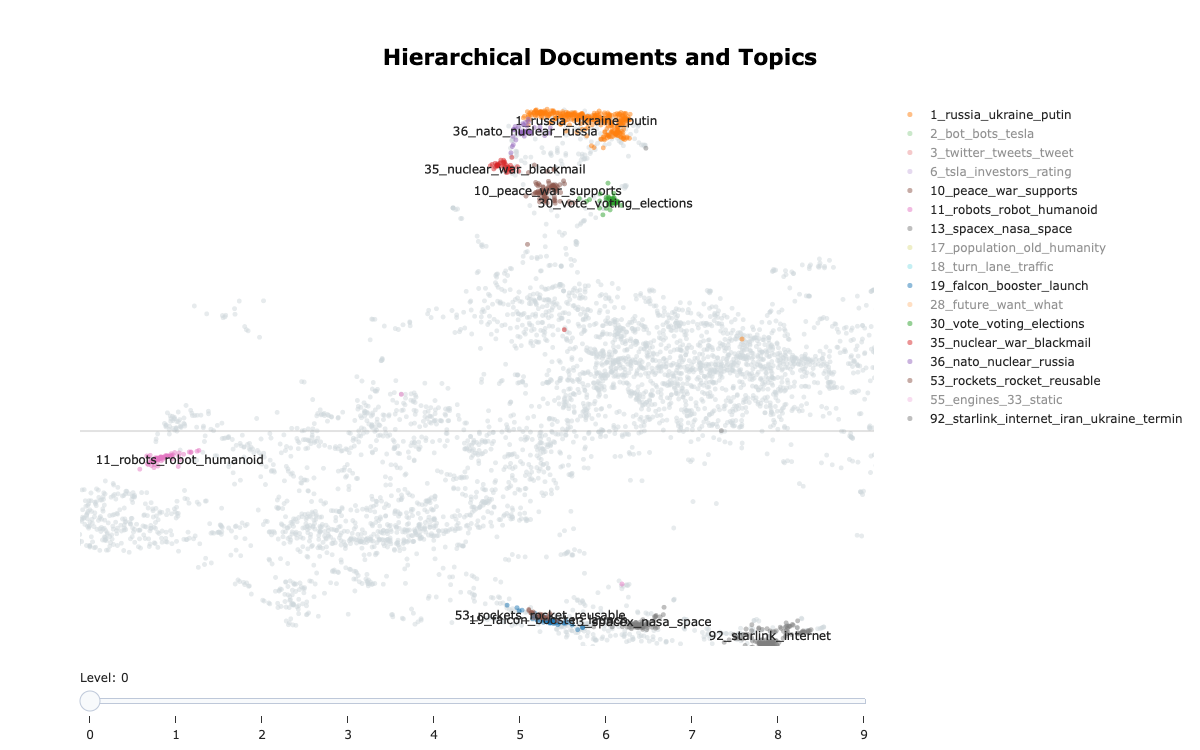

In [59]:
Image("fig/snapshot_all_docs.png")

It's clear here that there are distinct clusters of topics within this messy data. BERTopic has managed to successfully tease out what we expected in terms of tweets concerned to Elon Musk's interests. The data loaded in this notebook has already been merged, using the linkage dendogram above as a guide. The labels were decided upon manually by me. 

<a id=four></a>

## 4. Our main topics over time

[LINK to table of contents](#contents)

Now let's take a look at our select topics going over time. 

In [60]:
topics_agg = topic_values_select.groupby([pd.Grouper(key='datetime', freq='D'), 'By_or_at_Musk']).agg({
    # as we are dealing with 
    'Russia_Ukraine_and_war': lambda x : np.median(x),
    'Twitter_bots_and_spam': lambda x : np.median(x),
    'Starlink_and_satellites': lambda x : np.median(x),
    'SpaceX': lambda x : np.median(x),
    'Future_of_humanity_and_robots'	: lambda x : np.median(x),
    'Neuralink_and_brains'	: lambda x : np.median(x),
    '#likes' : 'sum',
    '#retweets' : 'sum',
    '#responses' : 'sum',    }).reset_index()
topics_agg_melt = topics_agg.melt(id_vars = ['datetime', 'By_or_at_Musk', '#likes', '#retweets', '#responses'])
topics_agg_melt.head()

,datetime,By_or_at_Musk,#likes,#retweets,#responses,variable,value
0,2022-09-01 00:00:00+00:00,Mentions @elonmusk,1830.0,79.0,211.0,Russia_Ukraine_and_war,6.092269e-03
1,2022-09-04 00:00:00+00:00,Mentions @elonmusk,3.0,0.0,2.0,Russia_Ukraine_and_war,5.727870e-03
2,2022-09-05 00:00:00+00:00,By @elonmusk,21550.0,1412.0,1556.0,Russia_Ukraine_and_war,1.288865e-02
3,2022-09-05 00:00:00+00:00,Mentions @elonmusk,190.0,10.0,38.0,Russia_Ukraine_and_war,7.905518e-03
4,2022-09-06 00:00:00+00:00,Mentions @elonmusk,212.0,25.0,11.0,Russia_Ukraine_and_war,6.021506e-307


In [61]:
topics_agg_melt.variable.unique()

array(['Russia_Ukraine_and_war', 'Twitter_bots_and_spam',
       'Starlink_and_satellites', 'SpaceX',
       'Future_of_humanity_and_robots', 'Neuralink_and_brains'],
      dtype=object)

In [62]:
topics_colour_dict = {
    'Russia_Ukraine_and_war': 'orange',
     'Twitter_bots_and_spam': 'darkblue',
    'Starlink_and_satellites': 'red',
        'SpaceX': 'black',
       'Future_of_humanity_and_robots': 'purple',
        'Neuralink_and_brains': 'green'
}

<AxesSubplot:title={'center':'Topics over time'}, xlabel='datetime', ylabel='value'>

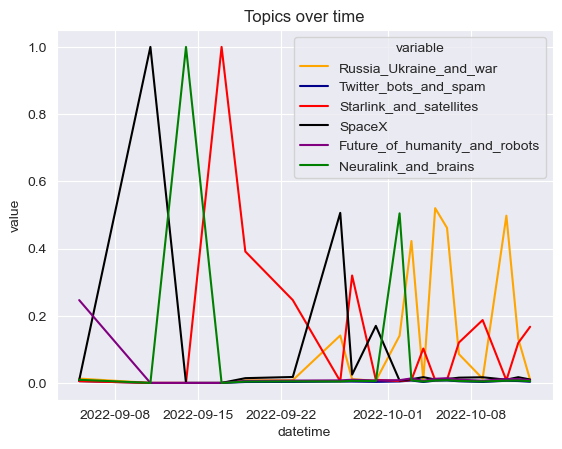

In [63]:
plt.title('Topics over time')
sns.lineplot(data=topics_agg_melt.loc[topics_agg_melt.By_or_at_Musk=='By @elonmusk'], x='datetime', y='value', hue='variable',
            palette=topics_colour_dict)

<AxesSubplot:title={'center':'Topics over time'}, xlabel='datetime', ylabel='value'>

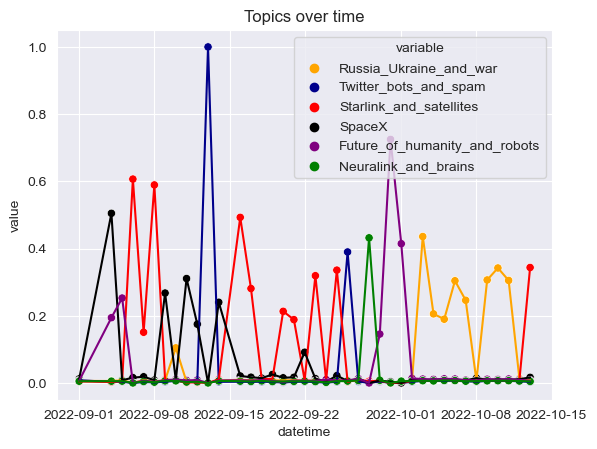

In [64]:
plt.title('Topics over time')
sns.scatterplot(data=topics_agg_melt.loc[topics_agg_melt.By_or_at_Musk!='By @elonmusk'], x='datetime', y='value', hue='variable',
            palette=topics_colour_dict)
sns.lineplot(data=topics_agg_melt.loc[topics_agg_melt.By_or_at_Musk!='By @elonmusk'], x='datetime', y='value', hue='variable',
            palette=topics_colour_dict, legend=False)

In [65]:
# topic_values_count = topic_values_select.groupby[topic_values_select.columns[:5]].apply(lambda x : x.argmax, axis=1)
repl_dict = dict(zip(list(range(0,7)), topic_values_select.columns[:7]))
if 'Main_topic' not in topic_values_select.columns:
    topic_values_select.insert(0, 'Main_topic' , topic_values_select[topic_values_select.columns[1:7]].apply(lambda x: repl_dict[x.argmax()], axis=1))
topic_values_select.head()

TypeError: reduction operation 'argmax' not allowed for this dtype

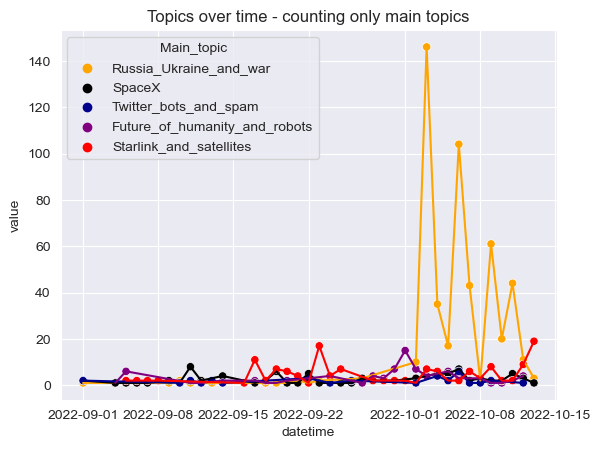

In [ ]:
topics_count = topic_values_select.groupby([pd.Grouper(key='datetime', freq='D'), 'Main_topic']).agg('size').reset_index().rename({0:'value'}, axis=1)

plt.title('Topics over time - counting only main topics')
sns.scatterplot(data=topics_count, x='datetime', y='value', hue='Main_topic',palette=topics_colour_dict,)
sns.lineplot(data=topics_count, x='datetime', y='value', hue='Main_topic', palette=topics_colour_dict, legend=False);

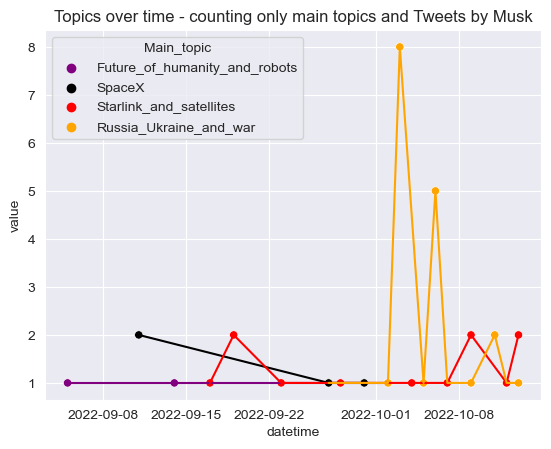

In [ ]:
topics_count = topic_values_select.groupby([pd.Grouper(key='datetime', freq='D'), 'Main_topic', 'By_or_at_Musk']).agg('size').reset_index().rename({0:'value'}, axis=1)

plt.title('Topics over time - counting only main topics and Tweets by Musk')
sns.scatterplot(data=topics_count.loc[topics_count.By_or_at_Musk=='By @elonmusk'], x='datetime', y='value', hue='Main_topic',palette=topics_colour_dict,)
sns.lineplot(data=topics_count.loc[topics_count.By_or_at_Musk=='By @elonmusk'], x='datetime', y='value', hue='Main_topic',palette=topics_colour_dict, legend=False);

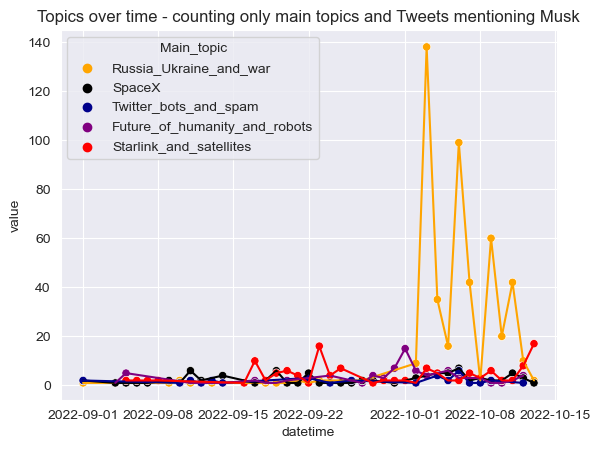

In [ ]:
plt.title('Topics over time - counting only main topics and Tweets mentioning Musk')
sns.scatterplot(data=topics_count.loc[topics_count.By_or_at_Musk!='By @elonmusk'], x='datetime', y='value', hue='Main_topic',palette=topics_colour_dict,)
sns.lineplot(data=topics_count.loc[topics_count.By_or_at_Musk!='By @elonmusk'], x='datetime', y='value', hue='Main_topic',palette=topics_colour_dict, legend=False);

For this selected period, we can clearly see that Musk's tweets on the Ukraine war rocketed in importance only in October, and that people mentioning him followed suit not long after. It's only now, towards the end of the period that Starlink has started to supersed the war as a topic (although still connected to it), for both Musk and those mentioning him. At the time of writing (18/10/22), which is after the end of the data period, Starlink's usage in Ukraine has indeed risen in prominence as a topic related to E Musk. 
Of course, these stats don't tell us a huge amount, and I explore this in more detail in the Rmarkdown notebook (mostly because I sincerely prefer ggplot and plotly_express over seaborn and matplotlib any day). 

<a id=five></a>

## 5. Sentiment over time

[LINK to table of contents](#contents)

On GoogleColab, I had also used a pre-trained [sentiment_classifier](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) from BERT in order to infer the sentiment of the tweets collected. Let's explore how sentiment varies across the other dimensions of our dataset. 

In [66]:
sent = pd.read_csv('data/preds/text_and_sentiment_preds.csv', index_col='tweet_id')
sent = sent.join(df[['datetime', 'By_or_at_Musk', 'language', '#likes', '#retweets', '#responses','display_name']])
# dropping non-english tweets
sent = sent.loc[sent.language=='en']
sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11914 entries, 1580168615357140992 to 1565189065158311937
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   clean_tweet_text      11914 non-null  object             
 1   Pred_sentiment_out    11914 non-null  object             
 2   Pred_sentiment_score  11914 non-null  float64            
 3   datetime              11914 non-null  datetime64[ns, UTC]
 4   By_or_at_Musk         11914 non-null  object             
 5   language              11914 non-null  object             
 6   #likes                11914 non-null  float64            
 7   #retweets             11914 non-null  float64            
 8   #responses            11914 non-null  float64            
 9   display_name          11914 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 1023.9+ KB


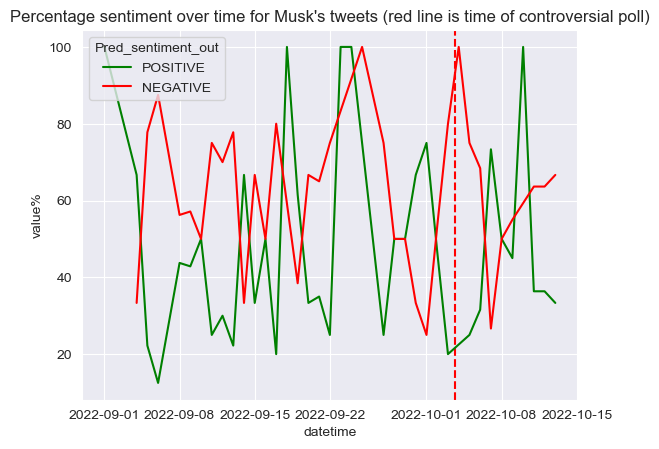

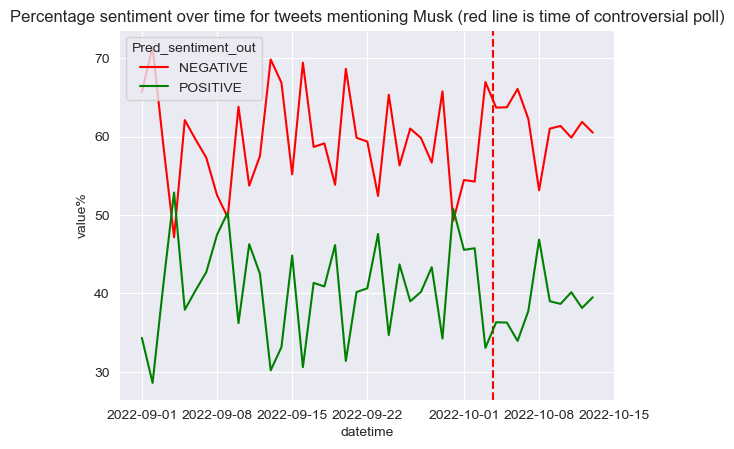

In [67]:
sent_agg = sent[['datetime', 'By_or_at_Musk', 'Pred_sentiment_out']].groupby([pd.Grouper(key='datetime', freq='4H'), 
                        'By_or_at_Musk', 'Pred_sentiment_out']).size().reset_index().rename({0:'value'}, axis=1)

sent_agg['value%'] = 100*sent_agg['value'] / sent_agg.groupby([
                        pd.Grouper(key='datetime', freq='D'), 
                        'By_or_at_Musk',])['value'].transform('sum')

sent_agg.to_csv(str(viz_path/'sent_agg_simple_4H.csv'))

sent_agg = sent[['datetime', 'By_or_at_Musk', 'Pred_sentiment_out']].groupby([pd.Grouper(key='datetime', freq='D'), 
                        'By_or_at_Musk', 'Pred_sentiment_out']).size().reset_index().rename({0:'value'}, axis=1)

sent_agg['value%'] = 100*sent_agg['value'] / sent_agg.groupby([
                        pd.Grouper(key='datetime', freq='D'), 
                        'By_or_at_Musk',])['value'].transform('sum')

sent_agg.to_csv(str(viz_path/'sent_agg_simple_D.csv'))

cutoff_date = pd.to_datetime('2022-10-03 16:15:43+00:00')

plt.title('Percentage sentiment over time for Musk\'s tweets (red line is time of controversial poll)')
plt.axvline(cutoff_date,0, sent_agg.value.max(), linestyle='dashed', color='red')
sns.lineplot(data=sent_agg.loc[sent_agg.By_or_at_Musk=='By @elonmusk'], 
            x ='datetime', 
            y='value%', hue='Pred_sentiment_out',
            palette = {'POSITIVE':'green', 'NEGATIVE':'red'})
plt.show()
###########
plt.title('Percentage sentiment over time for tweets mentioning Musk (red line is time of controversial poll)')
plt.axvline(cutoff_date,0, sent_agg.value.max(), linestyle='dashed', color='red')
sns.lineplot(data=sent_agg.loc[sent_agg.By_or_at_Musk=='Mentions @elonmusk'], x ='datetime', y='value%', hue='Pred_sentiment_out',
            palette = {'POSITIVE':'green', 'NEGATIVE':'red'} 
            
            )
plt.show()                        


Hmm, there doesn't appear to be much of a trend here in anyway (it may come out with better viz in ggplot later). If we take sentiment predictions at face value, it appears that the general sentiment of tweets mentioning Musk are generally more negative than positive. The period immediately after Musk's poll doesn't buck this trend in any way. 

Let's filter for only those tweets where the sentiment classifier was extremely certain of the sentiment. First we must determine what's a reasonable filter level to set. I could go arbitratily with 99% or 95% but how to decide? - using a (cumulative) distribution plot.
I will aim to only use 10% of the data points, which, as shown below, will require filtering by 0.9995911717414856

In [68]:
sent_score_pdf = sent['Pred_sentiment_score']/sum(sent['Pred_sentiment_score'])
sent_score_cdf = sent_score_pdf.sort_values().cumsum()
pred_filter = sent.loc[sent_score_cdf.loc[sent_score_cdf>=0.9].index[0]]['Pred_sentiment_score']
pred_filter

0.9995911717414856

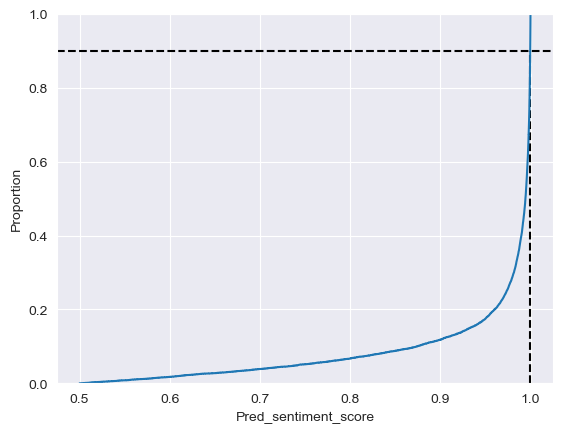

In [69]:
plt.axvline(pred_filter, 0, 0.9, color='black',linestyle='dashed')
plt.axhline(0.9, 0, pred_filter, color='black', linestyle='dashed')
sns.ecdfplot(data=sent, x='Pred_sentiment_score');
plt.show();

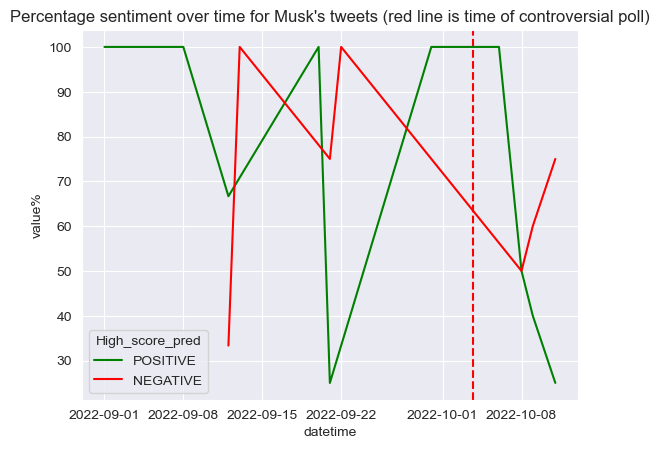

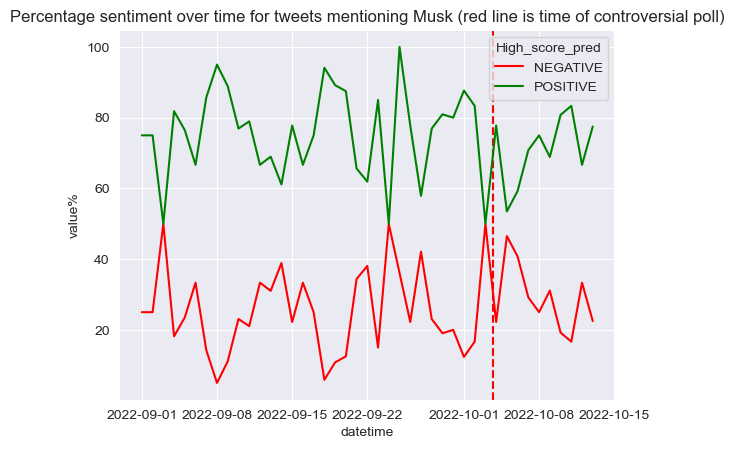

In [70]:
sent_90 = sent[['datetime', 'By_or_at_Musk', 'Pred_sentiment_out', 'Pred_sentiment_score']].copy()
sent_90['High_score_pred'] = 'NEUTRAL'
sent_90.loc[sent_90.Pred_sentiment_score>=pred_filter, 'High_score_pred'] = sent_90['Pred_sentiment_out']
sent_90 = sent_90.loc[sent_90.High_score_pred!='NEUTRAL']

sent_agg = sent_90[['datetime', 'By_or_at_Musk', 'High_score_pred']].groupby([pd.Grouper(key='datetime', freq='D'), 
                        'By_or_at_Musk', 'High_score_pred']).size().reset_index().rename({0:'value'}, axis=1)

sent_agg['value%'] = 100*sent_agg['value'] / sent_agg.groupby([
                        pd.Grouper(key='datetime', freq='D'), 
                        'By_or_at_Musk',])['value'].transform('sum')
# sent_agg
sent_agg.to_csv(str(viz_path/'sent_agg_simple_D_over_99.csv'))

plt.title('Percentage sentiment over time for Musk\'s tweets (red line is time of controversial poll)')
plt.axvline(cutoff_date,0, sent_agg.value.max(), linestyle='dashed', color='red')
sns.lineplot(data=sent_agg.loc[sent_agg.By_or_at_Musk=='By @elonmusk'], x ='datetime', y='value%', hue='High_score_pred',
            palette = {'POSITIVE':'green', 'NEGATIVE':'red'})
plt.show()
###########
plt.title('Percentage sentiment over time for tweets mentioning Musk (red line is time of controversial poll)')
plt.axvline(cutoff_date,0, sent_agg.value.max(), linestyle='dashed', color='red')
sns.lineplot(data=sent_agg.loc[sent_agg.By_or_at_Musk=='Mentions @elonmusk'], x ='datetime', y='value%', hue='High_score_pred',
            palette = {'POSITIVE':'green', 'NEGATIVE':'red'})
plt.show()          

There is arguably a small increase in the ratio of negative to positive tweets for those mentioning Musk, but not an immense jump, and the numbers seem to recover not long after. It is also important to remember that we are not able here to capture negative sentiment *towards* Elon Musk - only in connection to him (and even that, somewhat tangentially). It's perfectly possible that someone would have generated a very negative tweet where they are complaining about petroleum-based cars (for instance) and where they tag Elon Musk - which, realistically, translates into a positive sentment towards Musk, given that he's head of Tesla. 

Let's take a look at how this varies when we mix topics in as well. 
We'll need to get all the tweets we have assigned topics to using BERTopic, select the most likely one 

In [71]:
sent.head(2)

,clean_tweet_text,Pred_sentiment_out,Pred_sentiment_score,datetime,By_or_at_Musk,language,#likes,#retweets,#responses,display_name
tweet_id,,,,,,,,,,
1580168615357140992,My favorite least favorite is ONLY TWO IDEAS,NEGATIVE,0.999048,2022-10-12 12:08:50+00:00,Mentions @elonmusk,en,1.0,0.0,0.0,dcherring
1580013582778974208,My first day back to twit after a bit youre goin toe to toe w me man u smelled the fear huh Lol😘,NEGATIVE,0.981824,2022-10-12 01:52:48+00:00,Mentions @elonmusk,en,6.0,0.0,1.0,dcherring


In [72]:
topics_and_sentiment = topics_select.join([sent[['datetime', 'Pred_sentiment_out', 
                                                'Pred_sentiment_score', 'By_or_at_Musk',
                                                 '#likes',	'#retweets','#responses']]], how='left')
topics_and_sentiment.dropna(how='any', axis=0, inplace=True)
topics_and_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 1577086092930469890 to 1566822635056599043
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Main_topic            859 non-null    object             
 1   clean_tweet_text      859 non-null    object             
 2   datetime              859 non-null    datetime64[ns, UTC]
 3   Pred_sentiment_out    859 non-null    object             
 4   Pred_sentiment_score  859 non-null    float64            
 5   By_or_at_Musk         859 non-null    object             
 6   #likes                859 non-null    float64            
 7   #retweets             859 non-null    float64            
 8   #responses            859 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(4)
memory usage: 67.1+ KB


In [73]:
from scipy.stats import gmean

0.0
0.0
2967.8440046565775
16.0


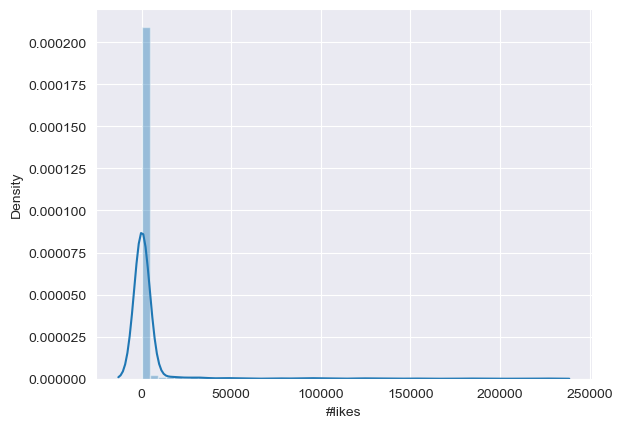

In [74]:
sns.distplot(topics_and_sentiment['#likes'])
print(hmean(topics_and_sentiment['#likes']))
print(gmean(topics_and_sentiment['#likes']))

print(np.mean(topics_and_sentiment['#likes']))
print(np.median(topics_and_sentiment['#likes']))

In [75]:
topics_and_sentiment.to_csv(str(viz_path / 'topic_sent_disagg.csv'))


#repeat for 4H intervals instead
top_sent_agg = topics_and_sentiment.groupby([
    pd.Grouper(key='datetime', freq='4H'), 
    'Main_topic',
    'By_or_at_Musk', 
    'Pred_sentiment_out'
                            ]).agg(
                                avg_likes = pd.NamedAgg('#likes', lambda x : np.mean(x)),
                                avg_retweets = pd.NamedAgg('#retweets', lambda x : np.mean(x)),
                                avg_responses = pd.NamedAgg('#responses', lambda x : np.mean(x)),

                                median_likes = pd.NamedAgg('#likes', lambda x : np.median(x)),
                                median_retweets = pd.NamedAgg('#retweets', lambda x : np.median(x)),
                                median_responses = pd.NamedAgg('#responses', lambda x : np.median(x)),

                                total_likes = pd.NamedAgg('#likes', lambda x : sum(x)),
                                total_retweets = pd.NamedAgg('#retweets', lambda x : sum(x)),
                                total_responses = pd.NamedAgg('#responses', lambda x : sum(x)),

                                count_sentiment = pd.NamedAgg('Pred_sentiment_out', lambda x: len(x)),
                                avg_sentiment_score = pd.NamedAgg('Pred_sentiment_score', lambda x : np.mean(x)), 
                                hmean_sentiment_score = pd.NamedAgg('Pred_sentiment_score', lambda x : hmean(x)),
                            ).reset_index()

top_sent_agg['count_sentiment_pct'] = 100*top_sent_agg['count_sentiment']/top_sent_agg.groupby([pd.Grouper(key='datetime', freq='D'), 
                                                                                'Main_topic',
                                                                                'By_or_at_Musk', ])['count_sentiment'].transform('sum')

top_sent_agg.to_csv(str(viz_path/'topic_sent_agg_4H.csv'))

# repeat for day intervals
top_sent_agg = topics_and_sentiment.groupby([
    pd.Grouper(key='datetime', freq='D'), 
    'Main_topic',
    'By_or_at_Musk', 
    'Pred_sentiment_out'
                            ]).agg(
                                avg_likes = pd.NamedAgg('#likes', lambda x : np.mean(x)),
                                avg_retweets = pd.NamedAgg('#retweets', lambda x : np.mean(x)),
                                avg_responses = pd.NamedAgg('#responses', lambda x : np.mean(x)),

                                total_likes = pd.NamedAgg('#likes', lambda x : sum(x)),
                                total_retweets = pd.NamedAgg('#retweets', lambda x : sum(x)),
                                total_responses = pd.NamedAgg('#responses', lambda x : sum(x)),

                                count_sentiment = pd.NamedAgg('Pred_sentiment_out', lambda x: len(x)),
                                avg_sentiment_score = pd.NamedAgg('Pred_sentiment_score', lambda x : np.mean(x)), 
                                hmean_sentiment_score = pd.NamedAgg('Pred_sentiment_score', lambda x : hmean(x)),
                            ).reset_index()

top_sent_agg['count_sentiment_pct'] = 100*top_sent_agg['count_sentiment']/top_sent_agg.groupby([pd.Grouper(key='datetime', freq='D'), 
                                                                                'Main_topic',
                                                                                'By_or_at_Musk', ])['count_sentiment'].transform('sum')

top_sent_agg.to_csv(str(viz_path/'topic_sent_agg_D.csv'))


In [76]:
top_sent_agg.head(1)

,datetime,Main_topic,By_or_at_Musk,Pred_sentiment_out,avg_likes,avg_retweets,avg_responses,total_likes,total_retweets,total_responses,count_sentiment,count_sentiment_pct
0,2022-09-01 00:00:00+00:00,Russia_Ukraine_and_war,Mentions @elonmusk,NEGATIVE,11.0,1.0,0.0,11.0,1.0,0.0,1,100.0


In [77]:
sent.head(1)

,clean_tweet_text,Pred_sentiment_out,Pred_sentiment_score,datetime,By_or_at_Musk,language,#likes,#retweets,#responses,display_name
tweet_id,,,,,,,,,,
1580168615357140992,My favorite least favorite is ONLY TWO IDEAS,NEGATIVE,0.999048,2022-10-12 12:08:50+00:00,Mentions @elonmusk,en,1.0,0.0,0.0,dcherring


In [84]:
# lastly, I'll take the sentiment data and join it with the main topics data

topics_categ_sent = topics_categ.join(sent[['Pred_sentiment_out', 'Pred_sentiment_score']], how='inner')

topics_categ_sent.Main_topic.value_counts()
topics_categ_sent.info()
topics_categ.to_csv('data/viz/topics_categorised.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 1577086092930469890 to 1566822635056599043
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Main_topic            859 non-null    object             
 1   clean_tweet_text      859 non-null    object             
 2   datetime              859 non-null    datetime64[ns, UTC]
 3   By_or_at_Musk         859 non-null    object             
 4   #likes                859 non-null    float64            
 5   #retweets             859 non-null    float64            
 6   #responses            859 non-null    float64            
 7   Pred_sentiment_out    859 non-null    object             
 8   Pred_sentiment_score  859 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(4)
memory usage: 67.1+ KB
